# Parameter Estimation Example (Linear)

From Crassidis & Junkins Chapter 1

In [28]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

np.random.seed(1)

# Generate sample time series data

True model:

$$
\tilde{y}(t) = t + \sin(t) + 2\cos(2t) - \frac{0.4e^{t}}{10^{-4}}
$$

In [29]:
t = np.linspace(0, 6, 100)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Add some normal (gaussian) noise

* mean = 0
* standard deviation = 0.5

In [30]:
# Example for Gaussian (normal) random variable

noise_mean = 0
noise_std = [0.5, 1, 2]

v_all = []

for i in range(len(noise_std)):
  std = i
  v = np.column_stack(np.random.normal(noise_mean, noise_std[std], len(y))).T
  v_all.append(v)

In [31]:
y_tilde_all = []

for v in v_all:
  y_tilde = y+v
  y_tilde_all.append(y_tilde)

# Plotting

In [32]:
def plot_tme(t, true, measured, estimated=None):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)

    ax.plot(t, true, '--', color='black', label='y true')
    ax.plot(t, measured, '*', color='blue', label='y measured')

    if estimated is not None:
        ax.plot(t, estimated, color='red')

    ax.set_xlabel('Time')
    ax.set_ylabel('Measurements or State')

    ax.legend()

    return ax

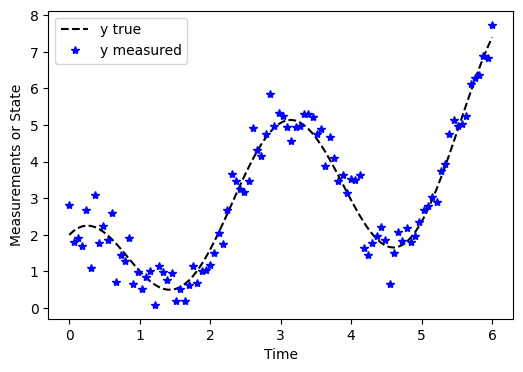

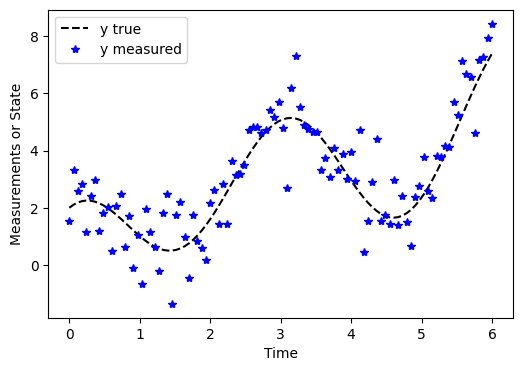

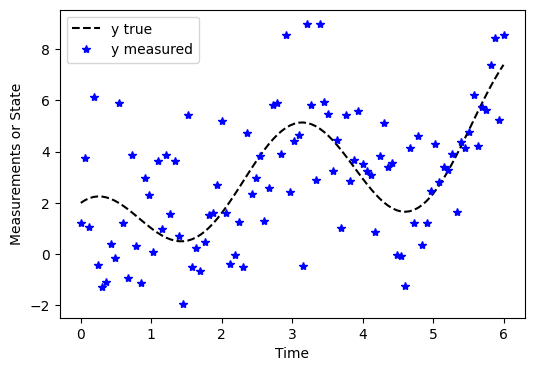

In [33]:
for y_tilde in y_tilde_all:
  plot_tme(t, y, y_tilde)

# Exercises

1. Change the standard deviation of the noise to a different value
2. Verify that the standard deviation of the difference between the noisy measurements and the true value is indeed equal to the standard deviation you specified.  

# Lessons learned and next steps

1. How to simulate simple time series in python
2. How to add normally distributed noise to time series
3. How to make simple plots in python